## Add Beautifule Figure

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
from mpl_toolkits.mplot3d import Axes3D

In [4]:
strike = np.linspace(50, 150, 24)
ttm = np.linspace(0.5, 2.5, 24)
strike, ttm = np.meshgrid(strike, ttm)
iv = (strike - 100) ** 2 / (100 * strike) / ttm


<ipython-input-9-4ffd57deb61c>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


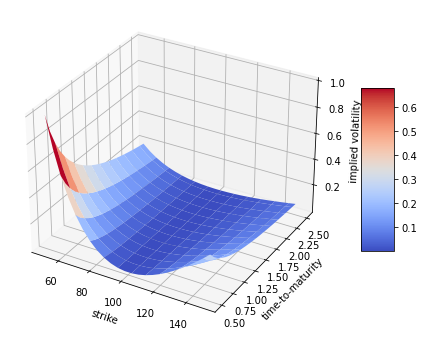

In [9]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(strike, ttm, iv, rstride=2, cstride=2, 
    cmap=plt.cm.coolwarm, linewidth=0.5, 
    antialiased=True)
ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility')
fig.colorbar(surf, shrink=0.5, aspect=5)


#### 交互式二维图表

In [12]:
import cufflinks as cf
import plotly.offline as plyo
plyo.init_notebook_mode(connected=True)

In [14]:
a = np.random.standard_normal((250, 5)).cumsum(axis=0)
index = pd.date_range('2019-01-01', freq='B', periods=len(a))

df = pd.DataFrame(100 + 5 * a, columns=list('abcde'), index=index)

In [33]:
plyo.iplot(
    df.iplot(asFigure=True,
    kind='line',
    theme='polar',
    title = 'A Demo. ',
    #subplots=True,
    xTitle = 'Dates',
    yTitle = 'Number'),
    filename='ply_01',

)

In [37]:
raw = pd.read_csv("./data/fxcm_eur_usd_eod_data.csv",
index_col=0, parse_dates=True
)

raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2820 entries, 2007-06-03 to 2017-05-31
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time        2820 non-null   object 
 1   OpenBid     2820 non-null   float64
 2   HighBid     2820 non-null   float64
 3   LowBid      2820 non-null   float64
 4   CloseBid    2820 non-null   float64
 5   OpenAsk     2820 non-null   float64
 6   HighAsk     2820 non-null   float64
 7   LowAsk      2820 non-null   float64
 8   CloseAsk    2820 non-null   float64
 9   TotalTicks  2820 non-null   int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 242.3+ KB


In [38]:
raw.columns

Index(['Time', 'OpenBid', 'HighBid', 'LowBid', 'CloseBid', 'OpenAsk',
       'HighAsk', 'LowAsk', 'CloseAsk', 'TotalTicks'],
      dtype='object')

In [41]:
quotes = raw[['OpenAsk', 'HighAsk', 'LowAsk', 'CloseAsk']].iloc[-60:] .copy()

quotes.head()

,OpenAsk,HighAsk,LowAsk,CloseAsk
Date,,,,
2017-03-23,1.07865,1.08188,1.07609,1.08012
2017-03-25,1.08012,1.08560,1.08012,1.08437
2017-03-26,1.08437,1.09071,1.08290,1.08634
2017-03-27,1.08634,1.08733,1.07994,1.08158
2017-03-28,1.08158,1.08273,1.07405,1.07667


In [44]:
qf = cf.QuantFig(
    quotes,
    title='EUR/USD Exchange Rate',
    legend='top',
    name='EUR/USD'
)

qf.add_bollinger_bands(periods=15,
    boll_std=2
)


qf.add_rsi(periods=14,
    showbands=False
)

plyo.iplot(
    qf.iplot(asFigure=True),
    filename='qf_01'
)


